### File: DSC680 Curry 
### Name: Adam Curry
### Date: 07/10/2021
### Course: DSC680 - Applied Data Science
Desc: This program uses countyr level data to answer a series of questions and to classify counties

Usage: This program should be used when reviewing my project milestone

In [301]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [302]:
df_orig = pd.read_csv(r'C:\Users\adamp\OneDrive\Desktop\Desktop\githubPage\Project11\county_statistics.csv')

Begin by examining the untouched dataframe and then check basic descriptive statistics. 

In [303]:
df_orig.drop(df_orig.columns[[0]],axis = 1,inplace = True)
df_orig.head()

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [51]:
display(df_orig.dtypes)

county                           object
state                            object
percentage16_Donald_Trump       float64
percentage16_Hillary_Clinton    float64
total_votes16                   float64
votes16_Donald_Trump            float64
votes16_Hillary_Clinton         float64
percentage20_Donald_Trump       float64
percentage20_Joe_Biden          float64
total_votes20                   float64
votes20_Donald_Trump            float64
votes20_Joe_Biden               float64
lat                             float64
long                            float64
cases                           float64
deaths                          float64
TotalPop                        float64
Men                             float64
Women                           float64
Hispanic                        float64
White                           float64
Black                           float64
Native                          float64
Asian                           float64
Pacific                         float64


In [52]:
print("The dimension of the table is: ", df_orig.shape)
print("\nDescribe Data")
print(df_orig.describe())

The dimension of the table is:  (4867, 50)

Describe Data
       percentage16_Donald_Trump  percentage16_Hillary_Clinton  total_votes16  \
count                3111.000000                   3111.000000   3.111000e+03   
mean                    0.636195                      0.316813   4.091585e+04   
std                     0.156098                      0.153265   1.082702e+05   
min                     0.041000                      0.031000   6.400000e+01   
25%                     0.550000                      0.204500   4.824500e+03   
50%                     0.667000                      0.285000   1.093500e+04   
75%                     0.750500                      0.399000   2.867500e+04   
max                     0.953000                      0.928000   2.314275e+06   

       votes16_Donald_Trump  votes16_Hillary_Clinton  \
count           3111.000000             3.111000e+03   
mean           19349.902604             1.956652e+04   
std            39130.388677             6.84

In [53]:
print("\nSummarized Data")
print(df_orig.describe(include=['O']))


Summarized Data
            county state
count         4867  4867
unique        2952    51
top     Unassigned    ME
freq            50   506


Its odd that "Unassigned" is listed as a top county. I will need to see why that is. 

In [54]:
print("States Counts")
print(df_orig['state'].value_counts())
print("County Counts")
print(df_orig['county'].value_counts())

States Counts
ME    506
MA    360
TX    256
VT    251
NH    243
VA    173
CT    172
GA    161
KY    122
MO    119
KS    107
IL    105
NC    102
IA    101
AK    100
TN     97
NE     95
IN     94
OH     90
MN     89
MI     87
MS     84
OK     79
AR     77
WI     74
AL     69
PA     69
FL     69
SD     68
LA     67
CO     66
NY     64
CA     60
MT     58
WV     57
ND     55
SC     48
ID     46
RI     43
WA     41
OR     38
NM     37
UT     37
MD     27
WY     25
NJ     23
NV     19
AZ     17
DC      8
HI      7
DE      5
Name: state, dtype: int64
County Counts
Unassigned                 50
Washington                 34
Jefferson                  28
Lincoln                    28
Franklin                   27
Jackson                    26
Madison                    23
Monroe                     21
Montgomery                 20
Union                      20
Warren                     20
Marion                     18
Clay                       18
Wayne                      17
Grant           

I will be using a lot of SQL to explore this dataset. This library has been my favorite to use

In [304]:
from pandasql import sqldf
# https://towardsdatascience.com/how-to-use-sql-in-pandas-62d8a0f6341
"""After you’ve imported everything, it’s a good idea to write a quick lambda function that can make writing your
queries easier. The reason for doing this is so that you don’t have to pass in global variables every time an object is used. 
Below is the lambda function that I was taught and have success with:"""
pysqldf = lambda q: sqldf(q, globals())

In [241]:
q = """SELECT
            a.*
       FROM df_orig a
       WHERE county = 'Unassigned'
;"""

pysqldf(q)

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Unassigned,AL,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Unassigned,AK,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Unassigned,AZ,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Unassigned,AR,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Unassigned,CA,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Unassigned,CO,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,Unassigned,CT,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Unassigned,DE,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Unassigned,FL,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Unassigned,GA,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


The unassigned all contain "None" values. This step just remvoes these rows. 

In [305]:
q = """SELECT
            a.*
       FROM df_orig a
       WHERE county <> 'Unassigned'
;"""

df_orig = pysqldf(q)

In [58]:
print("\nSummarized Data")
print(df_orig.describe(include=['O']))


Summarized Data
            county state
count         4817  4817
unique        2951    51
top     Washington    ME
freq            34   505


Washington county seems like a common county name. This seems to be more accurate. However, why does Maine have so many records? 

In [243]:
q = """SELECT
            *
       FROM df_orig a
       WHERE state = 'ME'
;"""

pysqldf(q)

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Androscoggin,ME,0.509,0.415,55340.0,28189.0,22975.0,NaN,NaN,NaN,...,4.0,1.7,4.1,24.2,53532.0,82.1,11.2,6.5,0.1,5.2
1,Aroostook,ME,0.555,0.383,34963.0,19419.0,13377.0,NaN,NaN,NaN,...,4.2,1.6,4.3,17.6,30233.0,75.0,16.4,8.4,0.2,5.3
2,Cumberland,ME,0.337,0.601,171249.0,57697.0,102935.0,0.300,0.679,6002.0,...,4.9,1.8,7.0,22.9,157303.0,81.8,10.4,7.7,0.1,4.0
3,Franklin,ME,0.482,0.427,16382.0,7900.0,7001.0,0.533,0.443,861.0,...,6.1,1.2,6.0,23.7,14426.0,74.3,15.5,10.0,0.2,6.1
4,Hancock,ME,0.428,0.504,31983.0,13682.0,16107.0,0.524,0.443,1486.0,...,5.2,1.4,6.5,23.1,26527.0,72.5,12.6,14.8,0.1,5.7
5,Kennebec,ME,0.481,0.444,65999.0,31753.0,29296.0,NaN,NaN,NaN,...,4.4,1.1,4.8,23.4,58332.0,73.1,19.7,7.1,0.1,5.7
6,Knox,ME,0.397,0.540,23021.0,9148.0,12440.0,0.538,0.414,1003.0,...,4.8,1.8,6.6,17.4,19568.0,73.0,12.3,14.7,0.1,4.7
7,Lincoln,ME,0.454,0.478,21432.0,9727.0,10241.0,0.664,0.313,2596.0,...,3.3,1.8,7.0,24.8,16588.0,73.4,12.5,14.1,0.1,3.4
8,Oxford,ME,0.521,0.391,31094.0,16214.0,12172.0,0.626,0.347,2325.0,...,2.3,1.0,5.0,28.4,25524.0,77.8,12.1,9.8,0.2,6.3
9,Penobscot,ME,0.519,0.409,80228.0,41601.0,32832.0,0.360,0.602,851.0,...,3.4,1.4,4.1,22.5,72746.0,78.2,15.5,6.2,0.1,6.5


wow, there are a ton of null values... what else is null?

In [60]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """
        SELECT
            'null count' as count_type
            ,state
            ,count(*) as CNT_
       FROM df_orig a
       WHERE percentage16_Donald_Trump is null
       GROUP BY state
        HAVING COUNT(*)> 1
        
;"""

pysqldf(q)

,count_type,state,CNT_
0,null count,AK,99
1,null count,CT,163
2,null count,DC,7
3,null count,HI,2
4,null count,IL,2
5,null count,LA,2
6,null count,MA,345
7,null count,MD,2
8,null count,ME,489
9,null count,MI,3


ok, there are a ton of null values. I'm going to remove these and see if there are still counties to work with within each state

In [61]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """
       SELECT
           state
           ,count(*) as CNT_
       
       FROM  df_orig 
        WHERE percentage16_Donald_Trump is not null
        and state in (select distinct state from (
        SELECT
            state
            ,count(*) as CNT_
       FROM df_orig a
       WHERE percentage16_Donald_Trump is null
       GROUP BY state
        HAVING COUNT(*)> 1
        ) T1)
       Group by 1
        
;"""

pysqldf(q)

,state,CNT_
0,CT,8
1,DC,1
2,HI,4
3,IL,102
4,LA,64
5,MA,14
6,MD,24
7,ME,16
8,MI,83
9,MO,115


It looks there may be some data quality issues and I may be omitting some counties, but this is a much better representation of the states. I checked a few states for confirmation:
- MO has 114 counties versus my 115
- HI has 5 counties versus my 4
- NH has 10, which matches my 10

https://thefactfile.org/us-states-counties/

I feel good about this cleanup step. 

In [306]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """
        SELECT DISTINCT
            *
       FROM df_orig
       WHERE percentage16_Donald_Trump is not null
        
;"""

df_orig = pysqldf(q)

print("\nSummarized Data")
print(df_orig.describe(include=['O']))


Summarized Data
            county state
count         3111  3111
unique        1820    50
top     Washington    TX
freq            31   254


Much better! 

The next step will add a variable to tell if the county was a blue or red state for the 2016 election and the 2020 election

In [307]:
# del long and lat columns. i won't have time to do spacial reproting
del df_orig['lat']
del df_orig['long']
df_orig.isna().sum()

county                           0
state                            0
percentage16_Donald_Trump        0
percentage16_Hillary_Clinton     0
total_votes16                    0
votes16_Donald_Trump             0
votes16_Hillary_Clinton          0
percentage20_Donald_Trump       25
percentage20_Joe_Biden          25
total_votes20                   24
votes20_Donald_Trump            24
votes20_Joe_Biden               24
cases                           41
deaths                          41
TotalPop                         2
Men                              2
Women                            2
Hispanic                         2
White                            2
Black                            2
Native                           2
Asian                            2
Pacific                          2
VotingAgeCitizen                 2
Income                           2
IncomeErr                        2
IncomePerCap                     2
IncomePerCapErr                  2
Poverty             

In [308]:
#impute nans with median of column at the state level
# percentage20_Donald_Trump       25
# percentage20_Joe_Biden          25
# total_votes20                   24
# votes20_Donald_Trump            24
# votes20_Joe_Biden               24

df_orig.percentage20_Donald_Trump.fillna(df_orig.groupby('state').percentage20_Donald_Trump.transform('median'), inplace=True)
df_orig.percentage20_Joe_Biden.fillna(df_orig.groupby('state').percentage20_Joe_Biden.transform('median'), inplace=True)
df_orig.total_votes20.fillna(df_orig.groupby('state').total_votes20.transform('median'), inplace=True)
df_orig.votes20_Donald_Trump.fillna(df_orig.groupby('state').votes20_Donald_Trump.transform('median'), inplace=True)
df_orig.votes20_Joe_Biden.fillna(df_orig.groupby('state').votes20_Joe_Biden.transform('median'), inplace=True)


In [309]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """

    SELECT 
        T1.* 
        /*calculate how different the county's voting records were from the prior voting term*/
        ,(votes20_Donald_Trump-votes16_Donald_Trump)/votes16_Donald_Trump as Pcnt_Red_Change_2020
        ,(percentage20_Joe_Biden-percentage16_Hillary_Clinton)/percentage16_Hillary_Clinton as Pcnt_Blue_Change_2020
        ,CASE WHEN red_2016 = 1 and red_2020 = 1 THEN 'red'
                WHEN (red_2016 = 1 and red_2020 = 0) OR (red_2016 = 0 and red_2020 = 1) THEN 'purple'
                WHEN red_2016 = 0 AND red_2020 = 0 THEN 'blue' ELSE 'err' END AS party_county
        ,CASE WHEN red_2016 = 0 THEN 1 ELSE 0 END AS blue_2016
        ,CASE WHEN red_2020 = 0 THEN 1 ELSE 0 END AS blue_2020
    FROM  (
        SELECT DISTINCT
            a.*
            /*could be interesting to see if the % of population voting had an impact on the election*/
            ,CAST(total_votes16/TotalPop AS DECIMAL(18,0)) AS p_pop_voted_2016
            ,CAST(total_votes20/TotalPop AS DECIMAL(18,0)) AS p_pop_voted_2020
            ,CASE WHEN percentage16_Donald_Trump > percentage16_Hillary_Clinton THEN 1 ELSE 0 END AS red_2016
            ,CASE WHEN percentage20_Donald_Trump > percentage20_Joe_Biden THEN 1 ELSE 0 END AS red_2020
       FROM df_orig a
       /*ensure there were vote*/
       where total_votes20 IS NOT NULL and total_votes20>0
        )T1 
;"""

df = pysqldf(q)

df.tail()

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Unemployment,p_pop_voted_2016,p_pop_voted_2020,red_2016,red_2020,Pcnt_Red_Change_2020,Pcnt_Blue_Change_2020,party_county,blue_2016,blue_2020
3105,Yuma,AZ,0.505,0.450,40759.0,20586.0,18336.0,0.523,0.461,68427.0,...,10.9,0.199524,0.334965,1,1,0.737394,0.024444,red,0,0
3106,Yuma,CO,0.805,0.150,4664.0,3755.0,701.0,0.826,0.156,4885.0,...,2.4,0.461371,0.483233,1,1,0.075100,0.040000,red,0,0
3107,Zapata,TX,0.328,0.656,3134.0,1028.0,2056.0,0.525,0.471,3867.0,...,12.4,0.217412,0.268262,0,1,0.976654,-0.282012,purple,1,0
3108,Zavala,TX,0.204,0.777,3390.0,692.0,2633.0,0.340,0.654,4379.0,...,10.1,0.278966,0.360352,0,0,1.153179,-0.158301,blue,1,1
3109,Ziebach,SD,0.480,0.460,766.0,368.0,352.0,0.446,0.531,906.0,...,27.0,0.270004,0.319351,1,0,0.097826,0.154348,purple,0,1


In [310]:
# basic aggregation 

q = """

    SELECT 
        party_county
        ,count(*) as cnt_
        ,sum(blue_2020) as sum_blue20
        ,sum(blue_2016) as sum_blue16
        ,sum(red_2020) as sum_red20
        ,sum(red_2016) as sum_red16
        ,sum(total_votes16) as sum_total16
        ,sum(total_votes20) as sum_total20
        ,max(total_votes16) as max_total_votes16
        ,min(total_votes16) as min_total_votes16
        ,max(total_votes20) as max_total_votes20
        ,min(total_votes20) as min_total_votes20
        ,avg(TotalPop) as AvgPopPerCounty
        ,avg(Pcnt_Red_Change_2020) as AvgRedChangePcnt
        ,avg(Pcnt_Blue_Change_2020) as AvgBlueChangePcnt
    FROM df
    group by 1
;"""

pysqldf(q)

,party_county,cnt_,sum_blue20,sum_blue16,sum_red20,sum_red16,sum_total16,sum_total20,max_total_votes16,min_total_votes16,max_total_votes20,min_total_votes20,AvgPopPerCounty,AvgRedChangePcnt,AvgBlueChangePcnt
0,blue,455,455,455,0,0,64410457.0,72622203.0,2314275.0,490.0,4139895.0,282.0,376015.600000,0.128374,0.047108
1,purple,89,58,31,31,58,8670360.0,9762802.0,1201934.0,186.0,2063663.0,194.0,241026.704545,0.002652,0.058222
2,red,2566,0,0,2566,2566,54206267.0,62503528.5,625720.0,64.0,601261.0,66.0,49793.792203,0.155949,0.052709


I was a little worried about these totals, as the blue counties were dwarfed by the number of red counties. Then I remembered that the population of blue counties is most likely larger than red counties, as they tend to be larger cities and coastal regions. Adding the average population revealed that the numbers line up pretty well. It is interesting to see the min and max values range for each category. One "blue" county had 2.3 million votes while another had 490. This seems to be a good indicator that the orders of magnitude are > 100 - 1,000, but are actually 10 - 1,000,000. 

The next step is to begin looking at correlations and see how things lined up. 

In [10]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """

    SELECT 
        party_county
        ,Pcnt_Red_Change_2020
        ,Pcnt_Blue_Change_2020
        ,(total_votes20-total_votes16)/total_votes20 as Pcnt_Change_2020
        ,total_votes20
        ,cases 
        ,deaths
        ,TotalPop
    FROM df
;"""

df_1 = pysqldf(q)

In [12]:
df_1.isna().sum()

party_county              0
Pcnt_Red_Change_2020      0
Pcnt_Blue_Change_2020     0
Pcnt_Change_2020          0
total_votes20             0
cases                    41
deaths                   41
TotalPop                  2
dtype: int64

In [11]:
#impute nans with median of column
df_1.cases.fillna(df_1.groupby('party_county').cases.transform('median'), inplace=True)
df_1.deaths.fillna(df_1.groupby('party_county').deaths.transform('median'), inplace=True)
df_1.TotalPop.fillna(df_1.groupby('party_county').TotalPop.transform('median'), inplace=True)
df_1.isna().sum()

party_county             0
Pcnt_Red_Change_2020     0
Pcnt_Blue_Change_2020    0
Pcnt_Change_2020         0
total_votes20            0
cases                    0
deaths                   0
TotalPop                 0
dtype: int64

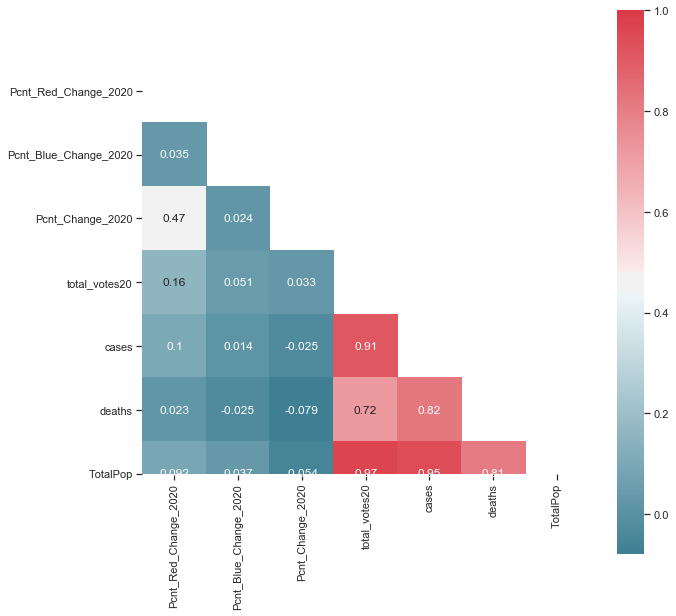

In [277]:
# view a correlation matrix heatmap
f, ax = plt.subplots(figsize=(10, 10))
corr = df_1.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

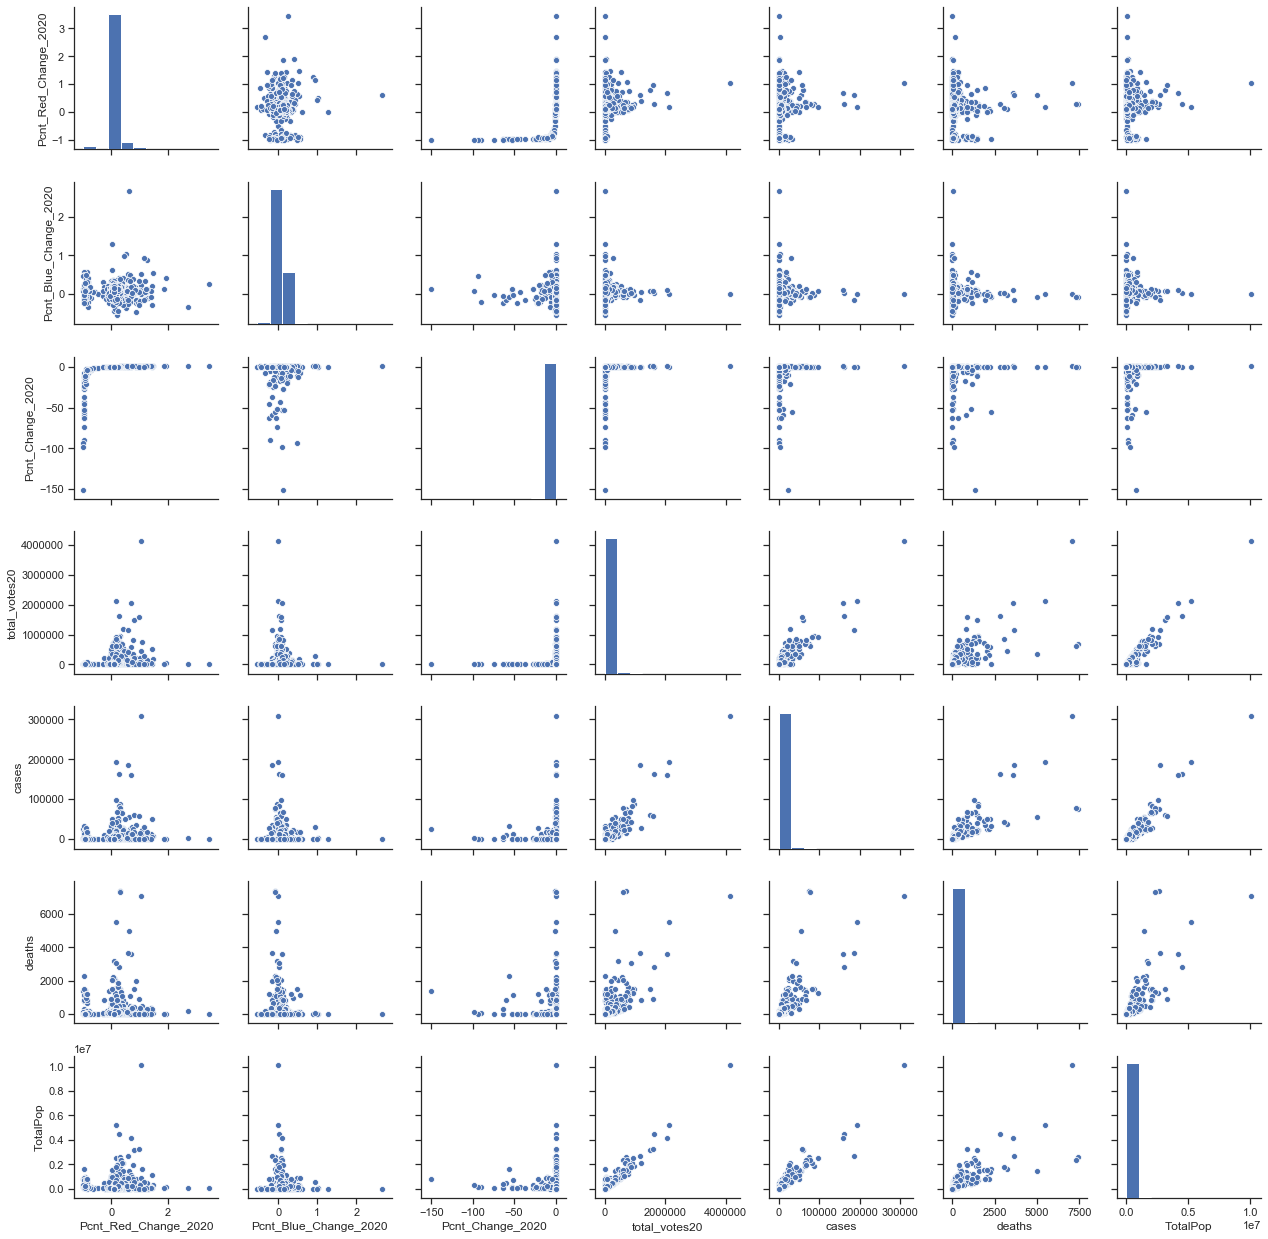

In [278]:
# plot the data
sns.pairplot(df_1)

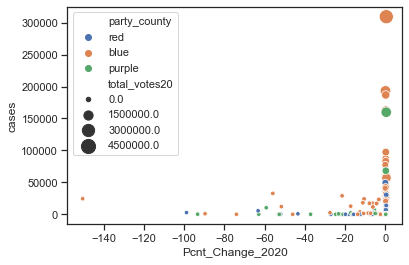

In [279]:
sns.scatterplot(
    data=df_1, x="Pcnt_Change_2020", y="cases", hue="party_county", size="total_votes20",
    sizes=(20, 200)
)

Wow! Huge outliers with one county resulting in -150% decrease in voting related to covid cases. 

Next steps will be basic linear regression to see impacts of covid data on the election changes in 2020

In [12]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.regressionplots import abline_plot

In [281]:
def runLinearRegression(df, party):
    df_ = df[(df['party_county'] == party)]
    del df_['party_county']
    scaler=MinMaxScaler()
    #scale data
    df_ = scaler.fit_transform(df_)
    df_ = pd.DataFrame(data=df_, columns=['Pcnt_Red_Change_2020', 'Pcnt_Blue_Change_2020','Pcnt_Change_2020',
                                          'total_votes20', 'cases', 'deaths','TotalPop'])
    X = df_[['cases', 'deaths']]
    y = df_['Pcnt_Change_2020']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
    # train the model
    model = sm.OLS(y_train, X_train.astype(float))
    # fit the data to the model
    results = model.fit()
    # make a prediction on the data
    ypred = results.predict(X_test.astype(float))
    # print the results
    print(results.summary())
    r2_score = metrics.r2_score(y_test, ypred)
    RMSE = metrics.mean_squared_error(y_test, ypred)
    return r2_score, RMSE, y_test,ypred
    
red_r2, red_RMSE, red_y_test, red_pred = runLinearRegression(df_1,'red')
blue_r2, blue_RMSE, blue_y_test, blue_pred = runLinearRegression(df_1,'blue')
purple_r2, purple_RMSE, purple_y_test, purple_pred = runLinearRegression(df_1,'purple')

                                 OLS Regression Results                                
Dep. Variable:       Pcnt_Change_2020   R-squared (uncentered):                   0.214
Model:                            OLS   Adj. R-squared (uncentered):              0.213
Method:                 Least Squares   F-statistic:                              209.2
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                    4.39e-81
Time:                        21:33:17   Log-Likelihood:                         -1986.9
No. Observations:                1539   AIC:                                      3978.
Df Residuals:                    1537   BIC:                                      3989.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Hypothesis Question # 1 - Did covid numbers influence the 2020 election?
Its hard to make a determination based on two variables alone, but based on these findings, COVID cases and deaths don't appear to have much impact on the overall election results. Broken into three categories shows a range of R^2 0.165 - 0.269. The p-value shows COVID cases may've impacted the change in votes in red counties, but COVID cases and deaths were all >.05 in all other categories.

This next portion will focus on classifying the counties based on non-voting variables. 

In [508]:
list(df)


['county',
 'state',
 'percentage16_Donald_Trump',
 'percentage16_Hillary_Clinton',
 'total_votes16',
 'votes16_Donald_Trump',
 'votes16_Hillary_Clinton',
 'percentage20_Donald_Trump',
 'percentage20_Joe_Biden',
 'total_votes20',
 'votes20_Donald_Trump',
 'votes20_Joe_Biden',
 'cases',
 'deaths',
 'TotalPop',
 'Men',
 'Women',
 'Hispanic',
 'White',
 'Black',
 'Native',
 'Asian',
 'Pacific',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment',
 'p_pop_voted_2016',
 'p_pop_voted_2020',
 'red_2016',
 'red_2020',
 'Pcnt_Red_Change_2020',
 'Pcnt_Blue_Change_2020',
 'party_county',
 'blue_2016',
 'blue_2020']

In [15]:
# bgin by limiting variable
q = """SELECT
            cases
            ,deaths
            ,TotalPop
            ,Men
            ,Women
            ,Hispanic
            ,White
            ,Black
            ,Native
            ,Asian
            ,Pacific
            ,VotingAgeCitizen
            ,Income
            ,IncomeErr
            ,IncomePerCap
            ,IncomePerCapErr
            ,Poverty
            ,ChildPoverty
            ,Professional
            ,Service
            ,Office
            ,Construction
            ,Production
            ,Drive
            ,Carpool
            ,Transit
            ,Walk
            ,OtherTransp
            ,WorkAtHome
            ,MeanCommute
            ,Employed
            ,PrivateWork
            ,PublicWork
            ,SelfEmployed
            ,FamilyWork
            ,Unemployment
            ,p_pop_voted_2016
       FROM df a
;"""

df_2 = pysqldf(q)


q = """SELECT
            state
            ,county
            ,party_county
       FROM df a
;"""
# just the county data will join after PCA
df_2a = pysqldf(q)

In [517]:
df_2.head()

,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,p_pop_voted_2016
0,805.0,17.0,24788.0,12044.0,12744.0,1.3,68.9,27.6,0.1,0.3,...,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4,0.432629
1,3182.0,102.0,62607.0,30433.0,32174.0,2.4,77.5,17.6,0.1,0.1,...,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9,0.437427
2,1227.0,19.0,32840.0,16079.0,16761.0,8.8,60.3,28.3,0.3,0.7,...,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4,0.479750
3,17451.0,181.0,435117.0,217999.0,217118.0,7.9,85.2,1.2,0.4,2.6,...,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3,0.449504
4,222.0,1.0,7192.0,3552.0,3640.0,1.7,96.6,0.3,0.0,0.4,...,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0,0.522664


In [518]:
df_2.describe()

,cases,deaths,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,p_pop_voted_2016
count,3110.000000,3110.000000,3.110000e+03,3.110000e+03,3.110000e+03,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,...,3110.000000,3110.000000,3110.000000,3.110000e+03,3110.000000,3110.000000,3110.000000,3110.000000,3110.000000,3108.000000
mean,2902.555949,73.425402,1.029315e+05,5.066208e+04,5.226934e+04,9.145225,77.075997,8.972878,1.506334,1.268939,...,1.523151,4.797797,23.469003,4.829335e+04,75.241543,16.709695,7.766559,0.282572,6.323826,0.435844
std,10733.439883,341.718783,3.298265e+05,1.619376e+05,1.679271e+05,13.731605,19.801321,14.497162,6.216701,2.549406,...,1.139796,3.079278,5.491798,1.583600e+05,7.290020,5.891127,3.869964,0.451250,2.971846,0.084589
min,0.000000,0.000000,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.700000,3.900000e+01,32.100000,4.400000,0.000000,0.000000,0.000000,0.115905
25%,245.000000,3.000000,1.120450e+04,5.626500e+03,5.546500e+03,2.000000,65.400000,0.600000,0.100000,0.300000,...,0.800000,2.900000,19.625000,4.615000e+03,71.800000,12.600000,5.200000,0.100000,4.400000,0.385275
50%,659.000000,11.000000,2.584750e+04,1.290250e+04,1.298700e+04,4.000000,84.400000,2.200000,0.300000,0.600000,...,1.300000,4.100000,23.200000,1.089550e+04,76.400000,15.700000,6.800000,0.200000,6.000000,0.437741
75%,1857.500000,37.750000,6.839550e+04,3.379525e+04,3.445950e+04,9.300000,93.000000,10.000000,0.600000,1.200000,...,1.900000,5.800000,26.900000,2.977525e+04,80.300000,19.300000,9.100000,0.300000,7.800000,0.490445
max,309190.000000,7404.000000,1.010572e+07,4.979641e+06,5.126081e+06,99.200000,100.000000,86.900000,82.200000,41.800000,...,13.800000,33.000000,45.100000,4.805817e+06,88.800000,62.300000,38.000000,8.000000,28.700000,0.965201


Since there are so manyvariables, I'm going to begin with PCA. I will then use the output variable as my predictor.
PCA will allow me to find the first two components in a two-dimensional space. I will then see how they relate via a single scatter-plot. 

The first step is to scale the data.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
scaler = StandardScaler()
scaler.fit(df_2)
df_scaled = scaler.transform(df_2)

I'm getting an error on fitting the PCA to the scaled dataset. These next two steps are borrowed from https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
and show that I have nan values

In [17]:
df_scaled[np.isnan(df_scaled)]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [18]:
df_2.isna().sum()

cases               41
deaths              41
TotalPop             2
Men                  2
Women                2
Hispanic             2
White                2
Black                2
Native               2
Asian                2
Pacific              2
VotingAgeCitizen     2
Income               2
IncomeErr            2
IncomePerCap         2
IncomePerCapErr      2
Poverty              2
ChildPoverty         2
Professional         2
Service              2
Office               2
Construction         2
Production           2
Drive                2
Carpool              2
Transit              2
Walk                 2
OtherTransp          2
WorkAtHome           2
MeanCommute          2
Employed             2
PrivateWork          2
PublicWork           2
SelfEmployed         2
FamilyWork           2
Unemployment         2
p_pop_voted_2016     2
dtype: int64

In [522]:
np.all(np.isfinite(df_scaled))

False

I forgot that I need to impute the data. These are corrupting my PCA!

In [20]:
#impute nans with median of column
df.Men.fillna(df.groupby('party_county').Men.transform('median'),inplace=True)
df.Women.fillna(df.groupby('party_county').Women.transform('median'),inplace=True)
df.Hispanic.fillna(df.groupby('party_county').Hispanic.transform('median'),inplace=True)
df.White.fillna(df.groupby('party_county').White.transform('median'),inplace=True)
df.Black.fillna(df.groupby('party_county').Black.transform('median'),inplace=True)
df.Native.fillna(df.groupby('party_county').Native.transform('median'),inplace=True)
df.Asian.fillna(df.groupby('party_county').Asian.transform('median'),inplace=True)
df.Pacific.fillna(df.groupby('party_county').Pacific.transform('median'),inplace=True)
df.VotingAgeCitizen.fillna(df.groupby('party_county').VotingAgeCitizen.transform('median'),inplace=True)
df.Income.fillna(df.groupby('party_county').Income.transform('median'),inplace=True)
df.IncomeErr.fillna(df.groupby('party_county').IncomeErr.transform('median'),inplace=True)
df.IncomePerCap.fillna(df.groupby('party_county').IncomePerCap.transform('median'),inplace=True)
df.IncomePerCapErr.fillna(df.groupby('party_county').IncomePerCapErr.transform('median'),inplace=True)
df.Poverty.fillna(df.groupby('party_county').Poverty.transform('median'),inplace=True)
df.ChildPoverty.fillna(df.groupby('party_county').ChildPoverty.transform('median'),inplace=True)
df.Professional.fillna(df.groupby('party_county').Professional.transform('median'),inplace=True)
df.Service.fillna(df.groupby('party_county').Service.transform('median'),inplace=True)
df.Office.fillna(df.groupby('party_county').Office.transform('median'),inplace=True)
df.Construction.fillna(df.groupby('party_county').Construction.transform('median'),inplace=True)
df.Production.fillna(df.groupby('party_county').Production.transform('median'),inplace=True)
df.Drive.fillna(df.groupby('party_county').Drive.transform('median'),inplace=True)
df.Carpool.fillna(df.groupby('party_county').Carpool.transform('median'),inplace=True)
df.Transit.fillna(df.groupby('party_county').Transit.transform('median'),inplace=True)
df.Walk.fillna(df.groupby('party_county').Walk.transform('median'),inplace=True)
df.OtherTransp.fillna(df.groupby('party_county').OtherTransp.transform('median'),inplace=True)
df.WorkAtHome.fillna(df.groupby('party_county').WorkAtHome.transform('median'),inplace=True)
df.MeanCommute.fillna(df.groupby('party_county').MeanCommute.transform('median'),inplace=True)
df.Employed.fillna(df.groupby('party_county').Employed.transform('median'),inplace=True)
df.PrivateWork.fillna(df.groupby('party_county').PrivateWork.transform('median'),inplace=True)
df.PublicWork.fillna(df.groupby('party_county').PublicWork.transform('median'),inplace=True)
df.SelfEmployed.fillna(df.groupby('party_county').SelfEmployed.transform('median'),inplace=True)
df.FamilyWork.fillna(df.groupby('party_county').FamilyWork.transform('median'),inplace=True)
df.Unemployment.fillna(df.groupby('party_county').Unemployment.transform('median'),inplace=True)
df.cases.fillna(df.groupby('party_county').cases.transform('median'),inplace=True)
df.deaths.fillna(df.groupby('party_county').deaths.transform('median'),inplace=True)
df.TotalPop.fillna(df.groupby('party_county').TotalPop.transform('median'),inplace=True)
df.p_pop_voted_2016.fillna(df.groupby('party_county').p_pop_voted_2016.transform('median'),inplace=True)
df.p_pop_voted_2020.fillna(df.groupby('party_county').p_pop_voted_2020.transform('median'),inplace=True)
df.isna().sum()

county                          0
state                           0
percentage16_Donald_Trump       0
percentage16_Hillary_Clinton    0
total_votes16                   0
votes16_Donald_Trump            0
votes16_Hillary_Clinton         0
percentage20_Donald_Trump       0
percentage20_Joe_Biden          0
total_votes20                   0
votes20_Donald_Trump            0
votes20_Joe_Biden               0
cases                           0
deaths                          0
TotalPop                        0
Men                             0
Women                           0
Hispanic                        0
White                           0
Black                           0
Native                          0
Asian                           0
Pacific                         0
VotingAgeCitizen                0
Income                          0
IncomeErr                       0
IncomePerCap                    0
IncomePerCapErr                 0
Poverty                         0
ChildPoverty  

redo the previouse df_2 steps

In [21]:
# bgin by limiting variable
q = """SELECT
            cases
            ,deaths
            /*,TotalPop*/ /*I'm excluding this var, as, intuitivley, most populated areas are blue*/
            ,Men
            ,Women
            ,Hispanic
            ,White
            ,Black
            ,Native
            ,Asian
            ,Pacific
            ,VotingAgeCitizen
            ,Income
            ,IncomeErr
            ,IncomePerCap
            ,IncomePerCapErr
            ,Poverty
            ,ChildPoverty
            ,Professional
            ,Service
            ,Office
            ,Construction
            ,Production
            ,Drive
            ,Carpool
            ,Transit
            ,Walk
            ,OtherTransp
            ,WorkAtHome
            ,MeanCommute
            ,Employed
            ,PrivateWork
            ,PublicWork
            ,SelfEmployed
            ,FamilyWork
            ,Unemployment
            ,p_pop_voted_2016
       FROM df a
;"""

df_2 = pysqldf(q)


q = """SELECT
            party_county
       FROM df a
;"""
# just the county data will join after PCA
df_2a = pysqldf(q)

q = """SELECT DISTINCT
            state
            ,county
            ,party_county
       FROM df a
;"""
# just the county data will join after PCA
df_2b = pysqldf(q)

rescale the dataset

In [22]:
scaler = StandardScaler()
scaler.fit(df_2)
df_scaled = scaler.transform(df_2)

In [23]:
# instantiate the PCA object 
pca = PCA(n_components=2) # reduce dimensonality
pca.fit(df_scaled)

PCA(n_components=2)

In [24]:
x_pca = pca.transform(df_scaled)
df_scaled.shape
x_pca.shape

(3110, 2)

In [529]:
x_pca[:,0]

array([-1.0907063 , -0.5086234 , -0.94463771, ..., -3.01920834,
       -2.08804264, -3.34560451])

In [530]:
x_pca[:,1]

array([2.32041688, 1.85178766, 0.98331506, ..., 4.74129262, 4.82301515,
       1.46853785])

Text(0, 0.5, '2nd PCA')

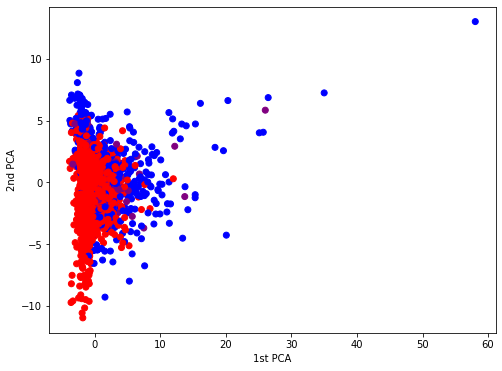

In [22]:
plt.figure(figsize=(8,6))
#plit 1st and 2nd PCA
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_2b['party_county'],label=df_2b['party_county'])
plt.xlabel('1st PCA')
plt.ylabel('2nd PCA')

Which county is that in the corner?

In [25]:
df_PCA = pd.DataFrame(x_pca)     

Join the data back to the categorical data points

In [26]:
df_PCA = pd.concat([df_2b, df_PCA], axis=1, join='inner')

In [557]:
df_PCA.head()

,state,county,party_county,0,1
0,SC,Abbeville,red,-1.090706,2.320417
1,LA,Acadia,red,-0.508623,1.851788
2,VA,Accomack,red,-0.944638,0.983315
3,ID,Ada,red,3.644559,-1.305844
4,IA,Adair,red,-1.008258,-2.197469


In [558]:
q = """SELECT DISTINCT
            state
            ,county
            ,party_county
            ,MAX("0") as MAX_0
            ,MAX("1") as MAX_1
       FROM df_PCA a
;"""
# just the county data will join after PCA
pysqldf(q)

,state,county,party_county,MAX_0,MAX_1
0,CA,Los Angeles,blue,58.048353,13.017145


LA County is heavily populated, so these components were probably influenced by some of the larger numbers in this category

The dataset now contains the two most impactful dimensions, reduced from the prior 36 

Create a histogram of three categorical vars one for each PCA

In [559]:
display(list(df_PCA.columns.values))

['state', 'county', 'party_county', 0, 1]

Text(0.5, 0, 'PCA_0')

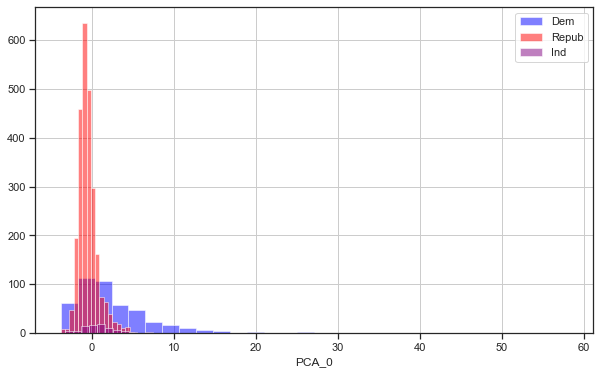

In [560]:
plt.figure(figsize=(10,6))
df_PCA[df_PCA['party_county']=='blue'][0].hist(alpha=0.5,color='blue',
                                              bins=30,label='Dem')
df_PCA[df_PCA['party_county']=='red'][0].hist(alpha=0.5,color='red',
                                              bins=30,label='Repub')
df_PCA[df_PCA['party_county']=='purple'][0].hist(alpha=0.5,color='purple',
                                              bins=30,label='Ind')
plt.legend()
plt.xlabel('PCA_0')

Text(0.5, 0, 'PCA_1')

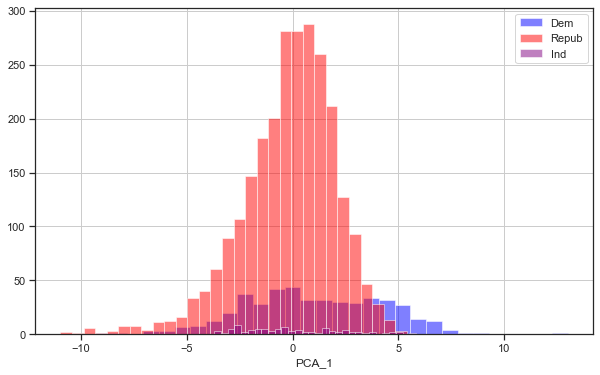

In [561]:
plt.figure(figsize=(10,6))
df_PCA[df_PCA['party_county']=='blue'][1].hist(alpha=0.5,color='blue',
                                              bins=30,label='Dem')
df_PCA[df_PCA['party_county']=='red'][1].hist(alpha=0.5,color='red',
                                              bins=30,label='Repub')
df_PCA[df_PCA['party_county']=='purple'][1].hist(alpha=0.5,color='purple',
                                              bins=30,label='Ind')
plt.legend()
plt.xlabel('PCA_1')

Super intersting to see the 2nd PCA component is a bell shaped distribution. 

There is a clear separation between the categories using the prior variables. 

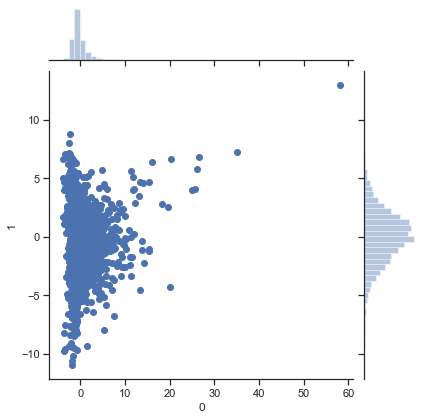

In [538]:
# a quick combination of the previous two distributions
sns.jointplot(x=0,y=1,data=df_PCA)

OK! So we have two variables assigned to each county, now lets run them through classification models

In [27]:
from sklearn.model_selection import train_test_split

In [540]:
X = df_PCA.drop('party_county',axis=1)
y = df_PCA['party_county']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1001)

#### Decision Tree

In [479]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [541]:
dt = DecisionTreeClassifier()

In [565]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

Predictions from the test set and create a classification report and a confusion matrix.

In [566]:
predictions = dt.predict(X_test)

In [568]:
print(classification_report(y_test,predictions))
#Return the mean accuracy on the given test data and labels.
dt.score(X_test, y_test)

              precision    recall  f1-score   support

        blue       0.52      0.48      0.50       129
      purple       0.06      0.11      0.08        19
         red       0.91      0.91      0.91       785

    accuracy                           0.83       933
   macro avg       0.50      0.50      0.50       933
weighted avg       0.84      0.83      0.83       933



0.8317256162915327

#### Random Forest

In [455]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [545]:
rfc = RandomForestClassifier(n_estimators=1500)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1500)

In [546]:
predictions = rfc.predict(X_test)

In [564]:
print(classification_report(y_test,predictions))
#Return the mean accuracy on the given test data and labels.
rfc.score(X_test, y_test)

              precision    recall  f1-score   support

        blue       0.62      0.49      0.55       129
      purple       0.25      0.05      0.09        19
         red       0.91      0.96      0.93       785

    accuracy                           0.87       933
   macro avg       0.59      0.50      0.52       933
weighted avg       0.85      0.87      0.86       933



0.8735262593783494

[[ 63   1  65]
 [  7   1  11]
 [ 32   2 751]]


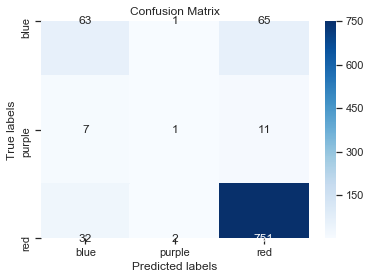

In [548]:
print(confusion_matrix(y_test,predictions))
labels = ['blue', 'purple', 'red']
cm = confusion_matrix(y_test, predictions, labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Blues');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['blue', 'purple','red']); ax.yaxis.set_ticklabels(['blue', 'purple','red']);

After trimming my dimensions down to two, I ran the data through a decision tree and random forest to predict if the county was democrat or republican (based on my defined logic of percent vote 2016 vs 2020). I found that the republican party frequency was easy to predict, but the democrat and independent counties weren’t. This is most likely a result of the number of “red” counties vs. the number of “blue” counties. 

### Hypothesis Question # 2 - Is it possible to predict if a county is republican or democrat without using non-voting variables (i.e., covid cases/deaths, poverty, profession)? 

The short answer is "yes". Using PCA, I was able to reduce the features from > 30 down to 2 components. Joining the components back to the counties revealed that red counties were easier to predict. This is most likely a result of the number of counties in the population, which means I may not have enough blue counties for this classificaiton. Perhaps several years' worth of data could help. Regardless, the models average accuracy were good: the decision tree predicted 83% of the records correct and 87% correct in the random forest. 

Next, I'm going to review Benford's distrubtion on a few of the variables. I'll combine them into red and blue counties, as well as overall numbers with: 2020 votes, 2016 votes, covid data, and Total Pop. The first three are potentially "human entered" numbers according to several people and the last is a known naturally occuring number. The last is to demonstrate how the distribution should look. 


Assumptions
1. The numbers need to be random and not assigned, with no imposed minimums or maximums.
2. The numbers should cover several orders of magnitude, and the dataset should be large; recommendations in the literature call for 100 to 1,000 samples as a minimum, though Benford’s law has been shown to hold true for datasets containing as few as 50 numbers.

https://towardsdatascience.com/frawd-detection-using-benfords-law-python-code-9db8db474cf8

This first data set is just the variables I want to explore

In [167]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """

    SELECT 
        T1.* 
        /*calculate how different the county's voting records were from the prior voting term*/
        ,(votes20_Donald_Trump-votes16_Donald_Trump)/votes16_Donald_Trump as Pcnt_Red_Change_2020
        ,(percentage20_Joe_Biden-percentage16_Hillary_Clinton)/percentage16_Hillary_Clinton as Pcnt_Blue_Change_2020
        ,CASE WHEN red_2016 = 1 and red_2020 = 1 THEN 'red'
        /*changing the logic slightly. If they moved red, then I'm considering them red and the other way around*/
                WHEN (red_2016 = 1 and red_2020 = 0) THEN 'blue'
                WHEN (red_2016 = 0 and red_2020 = 1) THEN 'red'
                WHEN red_2016 = 0 AND red_2020 = 0 THEN 'blue' ELSE 'err' END AS party_county
        ,CASE WHEN red_2016 = 0 THEN 1 ELSE 0 END AS blue_2016
        ,CASE WHEN red_2020 = 0 THEN 1 ELSE 0 END AS blue_2020
    FROM  (
        SELECT DISTINCT
            a.*
            /*could be interesting to see if the % of population voting had an impact on the election*/
            ,CAST(total_votes16/TotalPop AS DECIMAL(18,0)) AS p_pop_voted_2016
            ,CAST(total_votes20/TotalPop AS DECIMAL(18,0)) AS p_pop_voted_2020
            ,CASE WHEN percentage16_Donald_Trump > percentage16_Hillary_Clinton THEN 1 ELSE 0 END AS red_2016
            ,CASE WHEN percentage20_Donald_Trump > percentage20_Joe_Biden THEN 1 ELSE 0 END AS red_2020
       FROM df_orig a
       /*ensure there were vote*/
       where total_votes20 IS NOT NULL and total_votes20>0
        )T1 
;"""

df = pysqldf(q)

#impute nans with median of column
df.Men.fillna(df.groupby('party_county').Men.transform('median'),inplace=True)
df.Women.fillna(df.groupby('party_county').Women.transform('median'),inplace=True)
df.Hispanic.fillna(df.groupby('party_county').Hispanic.transform('median'),inplace=True)
df.White.fillna(df.groupby('party_county').White.transform('median'),inplace=True)
df.Black.fillna(df.groupby('party_county').Black.transform('median'),inplace=True)
df.Native.fillna(df.groupby('party_county').Native.transform('median'),inplace=True)
df.Asian.fillna(df.groupby('party_county').Asian.transform('median'),inplace=True)
df.Pacific.fillna(df.groupby('party_county').Pacific.transform('median'),inplace=True)
df.VotingAgeCitizen.fillna(df.groupby('party_county').VotingAgeCitizen.transform('median'),inplace=True)
df.Income.fillna(df.groupby('party_county').Income.transform('median'),inplace=True)
df.IncomeErr.fillna(df.groupby('party_county').IncomeErr.transform('median'),inplace=True)
df.IncomePerCap.fillna(df.groupby('party_county').IncomePerCap.transform('median'),inplace=True)
df.IncomePerCapErr.fillna(df.groupby('party_county').IncomePerCapErr.transform('median'),inplace=True)
df.Poverty.fillna(df.groupby('party_county').Poverty.transform('median'),inplace=True)
df.ChildPoverty.fillna(df.groupby('party_county').ChildPoverty.transform('median'),inplace=True)
df.Professional.fillna(df.groupby('party_county').Professional.transform('median'),inplace=True)
df.Service.fillna(df.groupby('party_county').Service.transform('median'),inplace=True)
df.Office.fillna(df.groupby('party_county').Office.transform('median'),inplace=True)
df.Construction.fillna(df.groupby('party_county').Construction.transform('median'),inplace=True)
df.Production.fillna(df.groupby('party_county').Production.transform('median'),inplace=True)
df.Drive.fillna(df.groupby('party_county').Drive.transform('median'),inplace=True)
df.Carpool.fillna(df.groupby('party_county').Carpool.transform('median'),inplace=True)
df.Transit.fillna(df.groupby('party_county').Transit.transform('median'),inplace=True)
df.Walk.fillna(df.groupby('party_county').Walk.transform('median'),inplace=True)
df.OtherTransp.fillna(df.groupby('party_county').OtherTransp.transform('median'),inplace=True)
df.WorkAtHome.fillna(df.groupby('party_county').WorkAtHome.transform('median'),inplace=True)
df.MeanCommute.fillna(df.groupby('party_county').MeanCommute.transform('median'),inplace=True)
df.Employed.fillna(df.groupby('party_county').Employed.transform('median'),inplace=True)
df.PrivateWork.fillna(df.groupby('party_county').PrivateWork.transform('median'),inplace=True)
df.PublicWork.fillna(df.groupby('party_county').PublicWork.transform('median'),inplace=True)
df.SelfEmployed.fillna(df.groupby('party_county').SelfEmployed.transform('median'),inplace=True)
df.FamilyWork.fillna(df.groupby('party_county').FamilyWork.transform('median'),inplace=True)
df.Unemployment.fillna(df.groupby('party_county').Unemployment.transform('median'),inplace=True)
df.cases.fillna(df.groupby('party_county').cases.transform('median'),inplace=True)
df.deaths.fillna(df.groupby('party_county').deaths.transform('median'),inplace=True)
df.TotalPop.fillna(df.groupby('party_county').TotalPop.transform('median'),inplace=True)
df.p_pop_voted_2016.fillna(df.groupby('party_county').p_pop_voted_2016.transform('median'),inplace=True)
df.p_pop_voted_2020.fillna(df.groupby('party_county').p_pop_voted_2020.transform('median'),inplace=True)
df.isna().sum()

county                          0
state                           0
percentage16_Donald_Trump       0
percentage16_Hillary_Clinton    0
total_votes16                   0
votes16_Donald_Trump            0
votes16_Hillary_Clinton         0
percentage20_Donald_Trump       0
percentage20_Joe_Biden          0
total_votes20                   0
votes20_Donald_Trump            0
votes20_Joe_Biden               0
cases                           0
deaths                          0
TotalPop                        0
Men                             0
Women                           0
Hispanic                        0
White                           0
Black                           0
Native                          0
Asian                           0
Pacific                         0
VotingAgeCitizen                0
Income                          0
IncomeErr                       0
IncomePerCap                    0
IncomePerCapErr                 0
Poverty                         0
ChildPoverty  

In [168]:
# bgin by limiting variable
q = """
       SELECT 'republican' as party_county, TotalPop,total_votes16,total_votes20,cases FROM df a where party_county ='red'
UNION
       SELECT 'democrat' as party_county, TotalPop,total_votes16,total_votes20,cases FROM df a where party_county ='blue'      
;"""
df_elect= pysqldf(q)
# bgin by limiting variable
q = """
       SELECT 'republican' as party_county, TotalPop,total_votes16,total_votes20,cases FROM df a where party_county ='red'
       and state IN ('AZ','GA','MI','PA','NH','TX','WI','MN','IA','NC','OH','NV')
UNION
       SELECT 'democrat' as party_county, TotalPop,total_votes16,total_votes20,cases FROM df a where party_county ='blue'     
        and state IN ('AZ','GA','MI','PA','NH','TX','WI','MN','IA','NC','OH','NV')
;"""
df_swing= pysqldf(q)

In [169]:
df_elect = df_elect.reset_index()
df_swing = df_swing.reset_index()

In [164]:
df_elect.head()

,index,party_county,TotalPop,total_votes16,total_votes20,cases
0,0,democrat,569.0,506.0,563.0,10.0
1,1,democrat,1203.0,575.0,736.0,8.0
2,2,democrat,1296.0,699.0,676.0,107.0
3,3,democrat,1844.0,897.0,928.0,31.0
4,4,democrat,2048.0,490.0,549.0,272.0


In [165]:
state_list = str("'SC','LA','VA','ID','IA','KY','MO','OK','CO','IL','IN','MS','ND','NE','OH','PA','WA','WI','VT','MN','FL','NC','CA','NY','WY','MI','MD','KS','TN','TX','ME','AZ','GA','AR','NJ','SD','AL','OR','WV','MA','UT','MT','NH','NM','RI','NV','DC','CT','HI','DE'")
swing_state_list = str("'AZ','GA','MI','PA','NH','TX','WI','MN','IA','NC','OH','NV'")

In [272]:
def chi_square_test(data_count,expected_counts,d):
    #taken from - https://towardsdatascience.com/frawd-detection-using-benfords-law-python-code-9db8db474cf8
    #Author - Elena Chatziapostolou - 08/12/2019
    """Return boolean on chi-square test (8 degrees of freedom which is P-val=0.05)."""
    
    """Chisquare test, which is a frequently used method that determines if an empirical (observed) distribution
    differs significantly from a theoretical (expected) distribution"""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected

    print("Chi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    #https://www.stat.purdue.edu/~lfindsen/stat503/Chi-Square.pdf
    print("Critical value at a P-value of 0.05 is 15.51.")    
    return chi_square_stat < 15.51
    

def benford_func(var,party,desc,main_df,s_list=state_list,col_var='party_county',sql_df='',df_type='full',q_type=1):
    
    """this function queries the main df and then calculates Benford's law, then plots the variable"""
    #I've always worked better with dataframes... this may seem line an unnecessary step, 
    #but I want the variable to review to be passed into a new dataframe with the category as the header.
    if q_type == 1:
        q = f"""SELECT  {var} AS {desc} FROM df a where party_county ='{party}' and state IN ({s_list});"""
    else:
        q = f"""SELECT  {var} FROM {sql_df} a where candidate = '{desc}' and state IN ({s_list});"""
    df_elect_cnt = pysqldf(q)
    df_elect_cnt = df_elect_cnt.reset_index()
    
    if q_type == 1:
        # get the length of each column and convert to integer
        N = len(df_elect_cnt[df_elect_cnt[desc].astype(int) > 0])
    else:
        N = len(df_elect_cnt[df_elect_cnt[var].astype(int) > 0])
    print(f'count of {desc} - {N}')
    # Benford's law - get the expected values of the distribution
    digit = np.arange(1, 10)
    # the distribution should follow a log distribution
    expected = np.log10(1 + 1/digit)*N
    print(expected)
    
    
    # get the actual counts of the distribution
    if q_type == 1:
        data = main_df.groupby([col_var, 'index']).sum()
    else:
        data = main_df.groupby([col_var, 'index']).sum()
    # get the first digit of each obsv
    digits = data.loc[desc][var].astype(str).str[0].astype(int)
    digits = digits[digits > 0]
    
    # plot the data
    cnt = digits.value_counts()
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

    axs.bar(cnt.index, cnt.values)
    axs.set_xticks(range(1, 10))

    axs.plot(digit, expected, marker='D', color='black', label='expected frequency') 
    
    axs.set_title("%s\nN=%d" % (desc+' '+var, N))
    axs.set_xlabel("Actual Leading Digit")
    axs.set_ylabel("Freq")

    plt.legend(loc=2, bbox_to_anchor=(0.0, -0.25))
    
    # print the counts and call chi squared 
    print(f'\n{desc} - {df_type} - {var}\n')
    print('expected counts: ' + str(expected))
    print('actual counts: ' + str(cnt.values))
    chi_square_test(cnt.values,expected,desc)


count of democrat - 513
[154.42838778  90.3348159   64.09357188  49.71483667  40.61997922
  34.34370308  29.7498688   26.24124402  23.47359266]

democrat - full - total_votes20

expected counts: [154.42838778  90.3348159   64.09357188  49.71483667  40.61997922
  34.34370308  29.7498688   26.24124402  23.47359266]
actual counts: [143  86  65  49  40  39  36  31  24]
Chi-squared Test Statistic = 3.905
Critical value at a P-value of 0.05 is 15.51.
count of republican - 2597
[781.77489874 457.30899977 324.46589897 251.67530378 205.63369599
 173.86081267 150.6050863  132.8431008  118.83220299]

republican - full - total_votes20

expected counts: [781.77489874 457.30899977 324.46589897 251.67530378 205.63369599
 173.86081267 150.6050863  132.8431008  118.83220299]
actual counts: [821 432 271 253 221 168 153 143 135]
Chi-squared Test Statistic = 16.546
Critical value at a P-value of 0.05 is 15.51.
count of democrat - 513
[154.42838778  90.3348159   64.09357188  49.71483667  40.61997922
  34.3

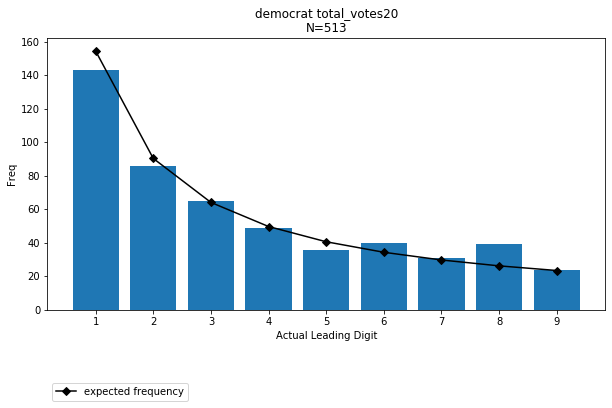

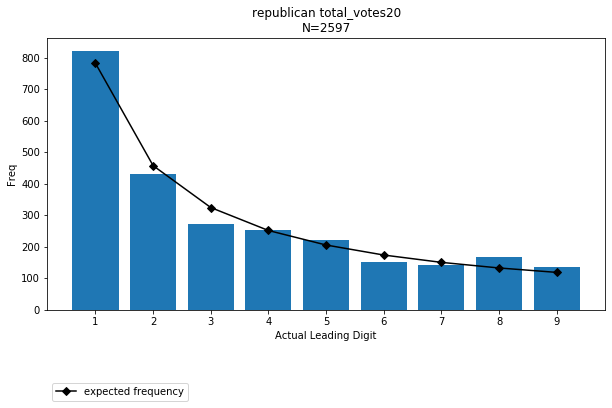

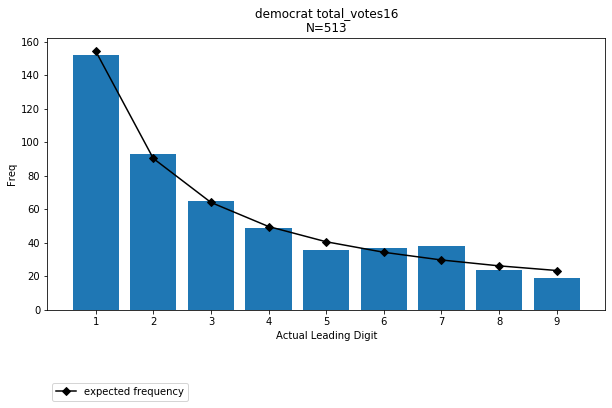

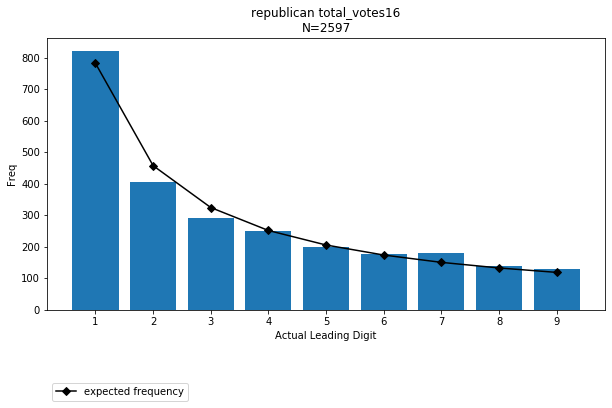

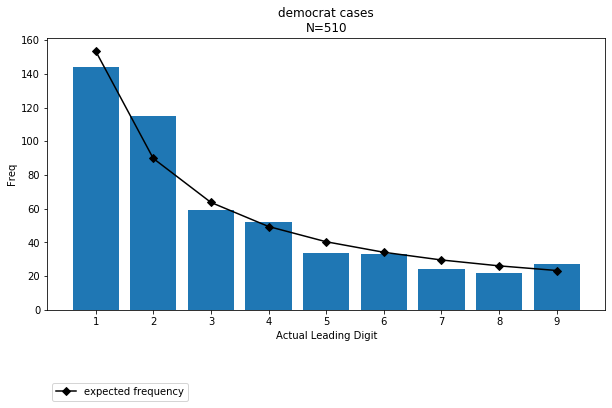

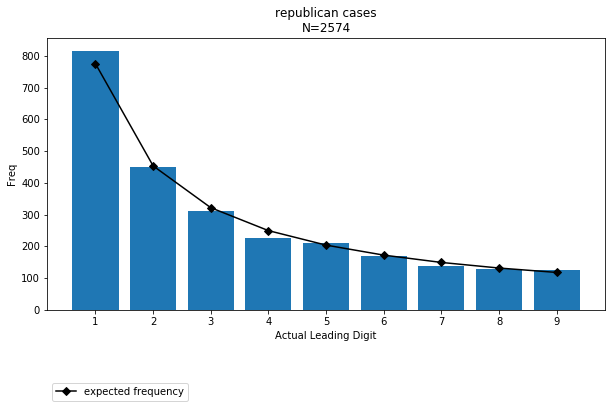

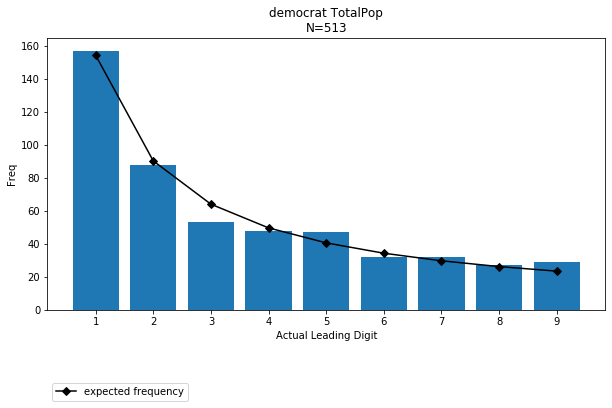

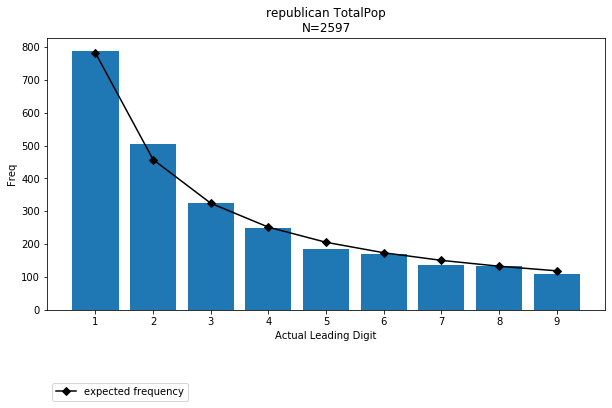

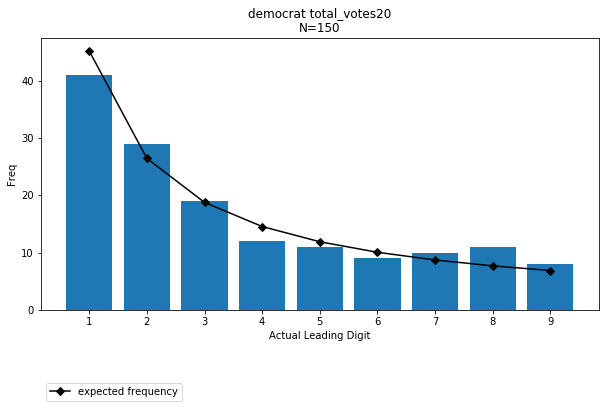

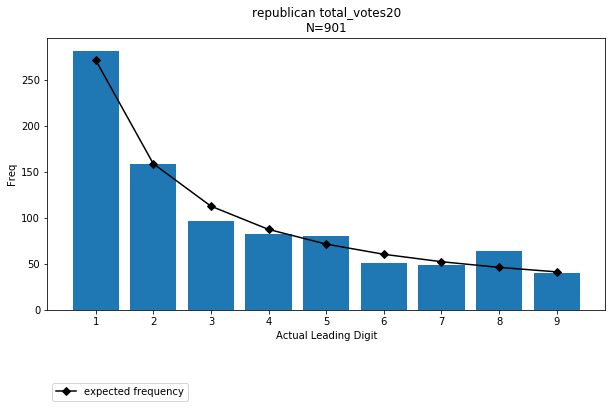

In [273]:
benford_func('total_votes20','blue','democrat',df_elect)
benford_func('total_votes20','red','republican',df_elect)
benford_func('total_votes16','blue','democrat',df_elect)
benford_func('total_votes16','red','republican',df_elect)
benford_func('cases','blue','democrat',df_elect)
benford_func('cases','red','republican',df_elect)
benford_func('TotalPop','blue','democrat',df_elect)
benford_func('TotalPop','red','republican',df_elect)
benford_func('total_votes20','blue','democrat',df_swing,s_list= swing_state_list,df_type='swing states')
benford_func('total_votes20','red','republican',df_swing,s_list=swing_state_list,df_type='swing states')

### Hypothesis Question # 3 - Will classifying counties and combing them with other like counties across the country help increase the levels of magnitude required to meet Benford’s law? 
As a novice in this area, it appears the answer is "yes". Using county level data across the country, instead of county level data at the state level increases the orders of magnitude from 10 - 1000 to 10 to 1,000,000. What spawned this analysis was the 2020 election. I heard rumblings that this was a clear indication of fraud in the election. So, I decided to investigate on my own. I am by no means an expert in fraud detection, so I had to define what Benford's law was before jumping in. Also, I watched a few videos and took the time to understand the calculations to ensure my dataset was qualified for this analysis. With my current understanding, I THINK this data set qualifies based on the orders of magnitude. 

### Hypothesis Question # 4 - Are the observed values the same as the theoretical Benford's law values? 
Overall, the answer is yes. It appears most of the observations are less than the critical chi-squared value (15.51), meaning the difference in observed versus theoreticl values is not statistically significant. However, there were a few items that stood out. Several of the red county variables were above the 15.51 threshold. I found this odd, especially with values such as "TotalPop", as this shouldn't be a "human" influenced number. This makes leads me to three possible outcomes: a - the data is questionable (remember I took this from a Kaggle dataset), b - I don't fully grasp the concept of Benford's law, c - the population is not significant and/or my definition of red and blue states isn't robust enough. If its option a, then I am super frustrated at this point in my analysis. If it's option b, so be it... at least I have some sort of understanding of Benford's law and can apply it on future projects (potentially work related proects around fraud). If its option c, then I can move on to the rest of the analysis. However, I want to explore an untouched dataset using only the votes as they stand for every county. This below step covers the findings further. 



In [299]:
# using percentage 16 as the base, as this is a required metric for the classification process. 

q = """

    SELECT 
        'Trump2020' as candidate
        ,votes20_Donald_Trump as votes
        ,state
    FROM df_orig a
        where votes20_Donald_Trump > 0
       
;"""
df_Trump2020 = pysqldf(q).reset_index()

q = """  
     SELECT 
        'Biden2020' as candidate
        ,votes20_Joe_Biden as votes
        ,state
    FROM df_orig a
        where votes20_Joe_Biden > 0
;"""

df_Biden2020 = pysqldf(q).reset_index()

q = """   
     SELECT 
        'Trump2016' as candidate
        ,votes16_Donald_Trump as votes
        ,state
    FROM df_orig a
        where votes16_Donald_Trump > 0

;"""     
df_Trump2016 = pysqldf(q).reset_index()

q = """
     SELECT 
        'Clinton2016' as candidate
        ,votes16_Hillary_Clinton as votes
        ,state
    FROM df_orig a   
        where votes16_Hillary_Clinton > 0
       
;"""

df_Clinton2016 = pysqldf(q).reset_index()

###############################SWING STATE FRAMES##################################

q = f"""

    SELECT 
        'Trump2020' as candidate
        ,votes20_Donald_Trump as votes
        ,state
    FROM df_orig a
        where votes20_Donald_Trump > 0
       and state in ({swing_state_list})
;"""
df_Trump2020s = pysqldf(q).reset_index()

q = f"""  
     SELECT 
        'Biden2020' as candidate
        ,votes20_Joe_Biden as votes
        ,state
    FROM df_orig a
        where votes20_Joe_Biden > 0
        and state in ({swing_state_list})
;"""

df_Biden2020s = pysqldf(q).reset_index()

q = f"""   
     SELECT 
        'Trump2016' as candidate
        ,votes16_Donald_Trump as votes
        ,state
    FROM df_orig a
        where votes16_Donald_Trump > 0
        and state in ({swing_state_list})

;"""     
df_Trump2016s = pysqldf(q).reset_index()

q = f"""
     SELECT 
        'Clinton2016' as candidate
        ,votes16_Hillary_Clinton as votes
        ,state
    FROM df_orig a   
        where votes16_Hillary_Clinton > 0
        and state in ({swing_state_list})
       
;"""

df_Clinton2016s = pysqldf(q).reset_index()


count of Biden2020 - 3110
[936.20328651 547.64381566 388.55947085 301.39014046 246.25367521
 208.20451575 180.3549551  159.08434481 142.30579564]

Biden2020 - full - votes

expected counts: [936.20328651 547.64381566 388.55947085 301.39014046 246.25367521
 208.20451575 180.3549551  159.08434481 142.30579564]
actual counts: [903 559 405 350 216 199 176 170 132]
Chi-squared Test Statistic = 15.673
Critical value at a P-value of 0.05 is 15.51.
count of Trump2020 - 3110
[936.20328651 547.64381566 388.55947085 301.39014046 246.25367521
 208.20451575 180.3549551  159.08434481 142.30579564]

Trump2020 - full - votes

expected counts: [936.20328651 547.64381566 388.55947085 301.39014046 246.25367521
 208.20451575 180.3549551  159.08434481 142.30579564]
actual counts: [911 501 378 319 259 221 192 167 162]
Chi-squared Test Statistic = 11.285
Critical value at a P-value of 0.05 is 15.51.
count of Clinton2016 - 3111
[936.50431651 547.81990692 388.68440959 301.48705047 246.33285645
 208.27146254 18

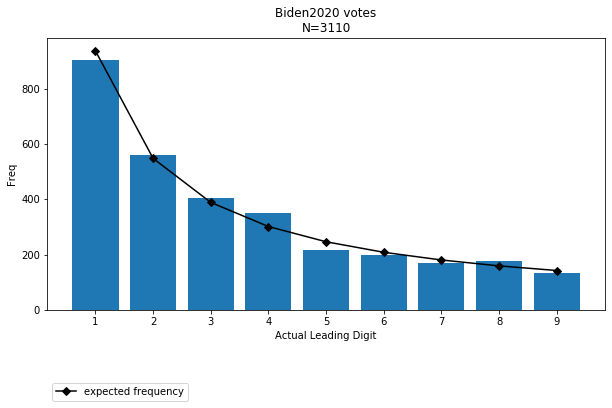

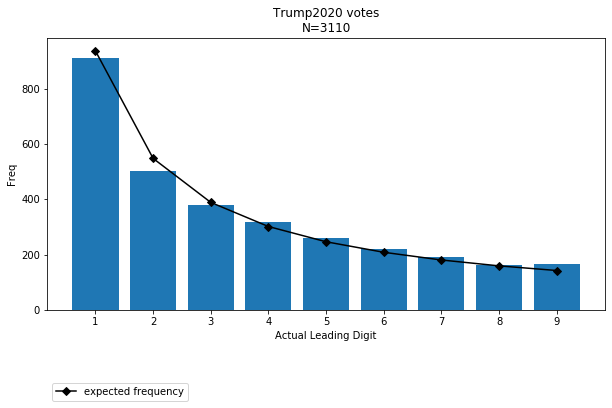

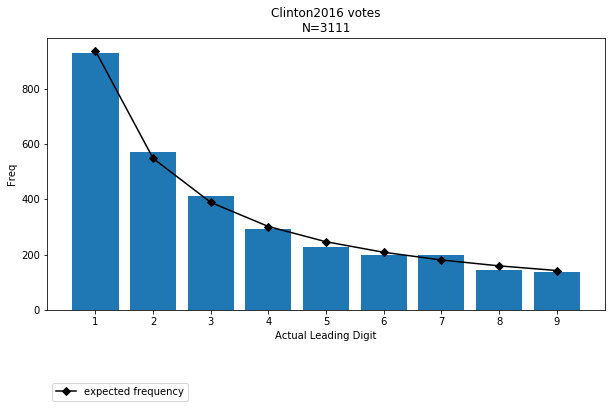

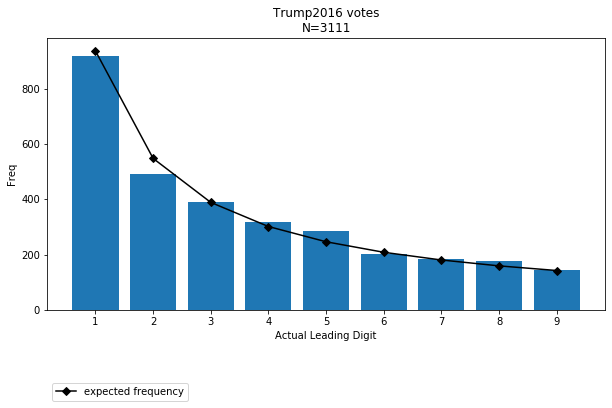

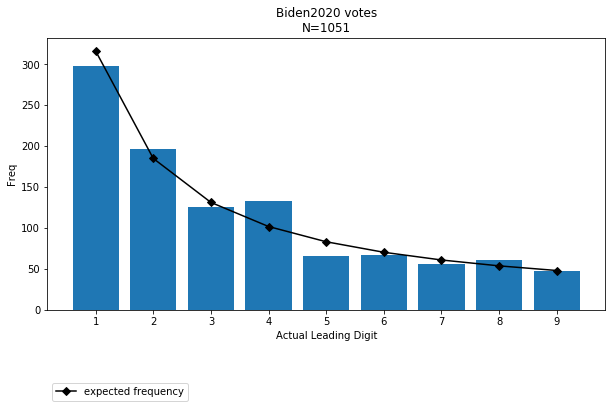

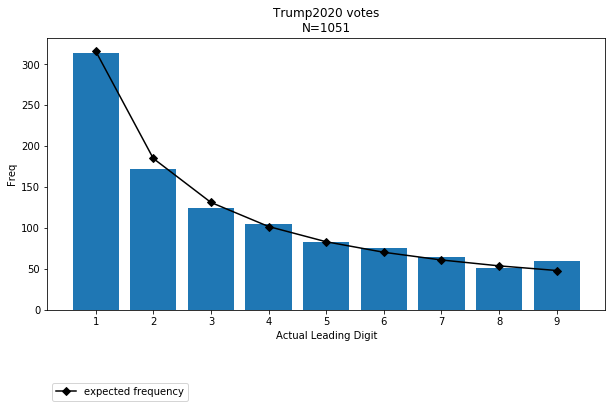

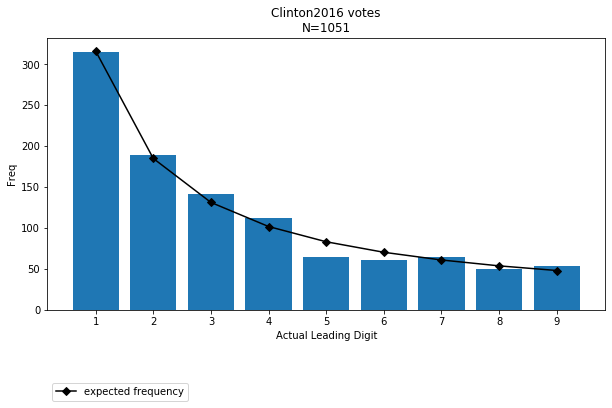

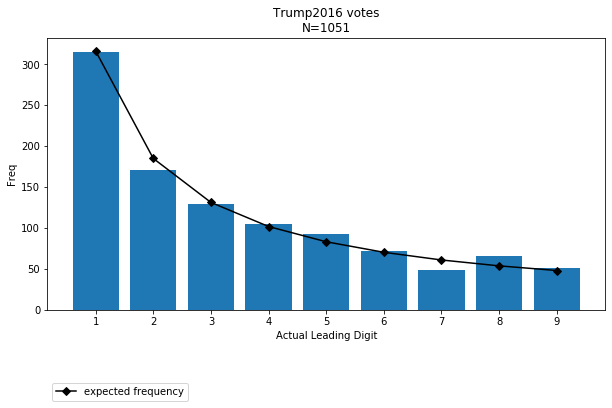

In [300]:
#def benford_func(var,party,desc,main_df,s_list=state_list,col_var='party_county',sql_df='',df_type='full',q_type=1):
benford_func('votes','','Biden2020',df_Biden2020,s_list= state_list,col_var='candidate',sql_df='df_Biden2020',q_type=0)
benford_func('votes','','Trump2020',df_Trump2020,s_list= state_list,col_var='candidate',sql_df='df_Trump2020',q_type=0)
benford_func('votes','','Clinton2016',df_Clinton2016,s_list= state_list,col_var='candidate',sql_df='df_Clinton2016',q_type=0)
benford_func('votes','','Trump2016',df_Trump2016,s_list= state_list,col_var='candidate',sql_df='df_Trump2016',q_type=0)
print('\n**************SWINGSTATES*************\n\n\n')
benford_func('votes','','Biden2020',df_Biden2020s,s_list= swing_state_list,col_var='candidate',sql_df='df_Biden2020s',df_type='swing states',q_type=0)
benford_func('votes','','Trump2020',df_Trump2020s,s_list= swing_state_list,col_var='candidate',sql_df='df_Trump2020s',df_type='swing states',q_type=0)
benford_func('votes','','Clinton2016',df_Clinton2016s,s_list= swing_state_list,col_var='candidate',sql_df='df_Clinton2016s',df_type='swing states',q_type=0)
benford_func('votes','','Trump2016',df_Trump2016s,s_list= swing_state_list,col_var='candidate',sql_df='df_Trump2016s',df_type='swing states',q_type=0)

The chi-squared test statistic is only greater than 15.51 on one of the eight calulations, which is Biden2020. Meaning, it the difference in distribution is statistically significant and the theoretical values are different from the observed values. This doesn't mean there was election fraud, as I've pointed out, there are several expert statisticians who have indicated the use of Benford's law in election data isn't advised. Also, I only spot checked the dataset. There may be data discrepancies missing values or incorrect values. 

quick test on covid and total pop, just a gut check

In [319]:
q = """

    SELECT 
        'Trump2020' as candidate
        ,TotalPop as votes
        ,state
    FROM df_orig a
        where TotalPop > 0
       
;"""
df_Trump2020 = pysqldf(q).reset_index()

q = """  
     SELECT 
        'Biden2020' as candidate
        ,TotalPop as votes
        ,state
    FROM df_orig a
        where TotalPop > 0
;"""

df_Biden2020 = pysqldf(q).reset_index()

count of Biden2020 - 3109
[935.90225652 547.4677244  388.43453212 301.29323044 246.17449396
 208.13756896 180.29696315 159.03319229 142.26003815]

Biden2020 - full - votes

expected counts: [935.90225652 547.4677244  388.43453212 301.29323044 246.17449396
 208.13756896 180.29696315 159.03319229 142.26003815]
actual counts: [945 590 378 299 231 201 168 159 138]
Chi-squared Test Statistic = 5.837
Critical value at a P-value of 0.05 is 15.51.
count of Trump2020 - 3109
[935.90225652 547.4677244  388.43453212 301.29323044 246.17449396
 208.13756896 180.29696315 159.03319229 142.26003815]

Trump2020 - full - votes

expected counts: [935.90225652 547.4677244  388.43453212 301.29323044 246.17449396
 208.13756896 180.29696315 159.03319229 142.26003815]
actual counts: [945 590 378 299 231 201 168 159 138]
Chi-squared Test Statistic = 5.837
Critical value at a P-value of 0.05 is 15.51.


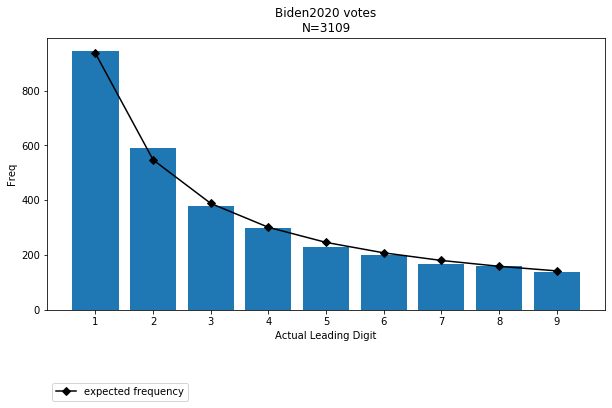

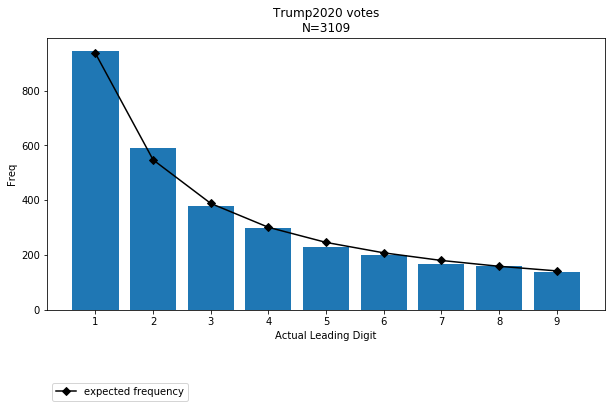

In [320]:
#def benford_func(var,party,desc,main_df,s_list=state_list,col_var='party_county',sql_df='',df_type='full',q_type=1):
benford_func('votes','','Biden2020',df_Biden2020,s_list= state_list,col_var='candidate',sql_df='df_Biden2020',q_type=0)
benford_func('votes','','Trump2020',df_Trump2020,s_list= state_list,col_var='candidate',sql_df='df_Trump2020',q_type=0)